In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.rcParams['figure.figsize'] = [3, 2]

Objective: verify that if each ion channel in a large population undergoes stochastic transitions between the open and the closed state, according to opening rate $\alpha$ and closing rate $\beta$ (per unit time), then the fraction $x(t)$ of open channels at any given time $t$ obeys the following dynamics:

$$  \tau \frac{dx}{dt} = -x + x_\infty $$

where $\tau = \frac1{\alpha+\beta}$ and $x_\infty = \frac{\alpha}{\alpha + \beta}$.

In [8]:
n = 10000 # very large number statistically identical ion channels in the membrane
alpha = 0.9 # opening rate per unit time
beta = 0.6 # closing rate per unit time
dt = 1E-3 # 1us
n_steps = 6000 # 6 ms

In [9]:
channels = np.zeros((n, n_steps)) # we start with all channels closed

In [10]:
x = np.zeros(n_steps) 
# this will keep track of the fraction of open channels within `channels`

In [11]:
# simulate the stochastic opening and closing of each individual channel
for t in range(n_steps-1):
    # extract current state of ion channels at time t
    s = channels[:, t]
    # probability of each channel being open in the next step, given s
    # if open at t, then stays open at t+1 with probability (1-beta*dt)
    # if closed at t, becomes open at t+1 with probability alpha*dt
    p = (1-dt*beta)*s + alpha*dt*(1-s)
    new_s = np.random.binomial(1, p)
    channels[:, t+1] = new_s # flip a biased coin for each channel
    x[t+1] = np.mean(new_s)

Text(0, 0.5, 'Channel #id')

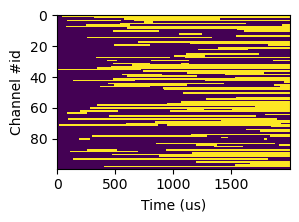

In [12]:
plt.imshow(channels[0:100, 0:2000], aspect='auto', interpolation='none')
plt.xlabel("Time (us)")
plt.ylabel("Channel #id")

Text(0, 0.5, 'fraction open')

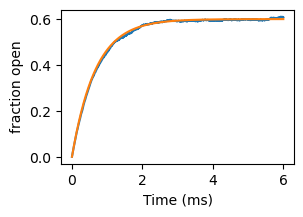

In [13]:
t = np.linspace(0, 6, n_steps)
x_0 = 0
x_inf = alpha/(alpha+beta)
tau = 1/(alpha+beta)
x_theory = x_inf + (x_0 - x_inf) * np.exp(-t/tau)
plt.plot(t, x)
plt.plot(t, x_theory)
plt.xlabel("Time (ms)")
plt.ylabel("fraction open")

Theoretical prediction: $x(t) = x_\infty + (x_0 - x_\infty) e^{-t/\tau}$, with $x_0 = 0$ in this particular example because we start with all channels closed.